<a href="https://colab.research.google.com/github/Georgia-MAX-holic/footprints/blob/main/PJ/game_sale/New/Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
!pip install category_encoders

import pandas as pd 
from google.colab import drive

drive.mount('/content/drive')
filetitle = '/content/drive/My Drive/cpding/asdf/Game_data_EDA.csv'

df = pd.read_csv(filetitle)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
df_chart = df[["Name","Global_Sales"]]
df_chart.set_index("Name", inplace = True )
sales_max = df_chart.idxmax(axis=0 , skipna=True )
sales_max

Global_Sales    Wii Sports
dtype: object

가장 많이 팔린 제품 = 닌텐도 윌 스포츠 

In [179]:
df=  df.sort_values(by="Rank" , ascending = True)
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Null,Critic_Score,Critic_Count,User_Score,User_Count,Unnamed: 17,Rating
0,0.0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,7.100168,76.0,51.0,8,322.0,NaN,E
2,1.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
3,448.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2.732611,82.0,73.0,8.3,709.0,NaN,E
6,4.0,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2.715577,80.0,73.0,8,192.0,NaN,E


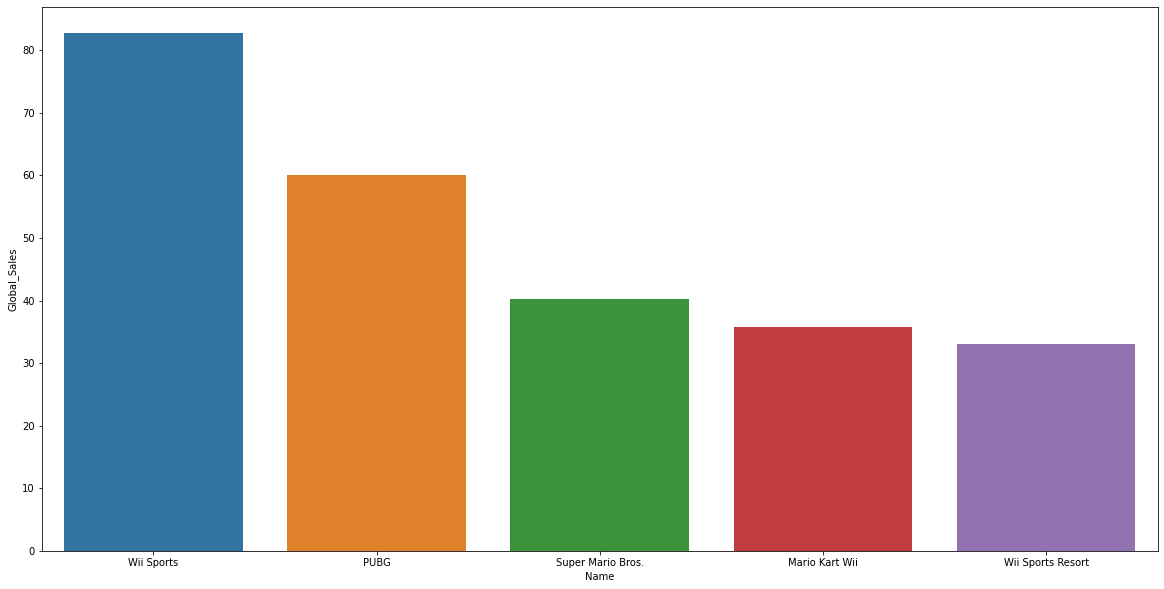

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

top5_visual=df.loc [[0,1,2,3,5,6]]
plt.figure(figsize=(20,10))
sns.barplot(x='Name', y='Global_Sales', data=top5_visual) 

In [181]:
df_Platform = df[["Platform","Global_Sales"]].dropna()
df_Genre =  df[["Genre", "Global_Sales"]]

In [182]:
df_Platform = df_Platform.groupby("Platform").sum()
df_Genre = df_Genre.groupby("Genre").sum()

In [183]:
df_Platform = df_Platform.sort_values(by="Global_Sales" , ascending=False).reset_index()
df_Genre = df_Genre.sort_values(by="Global_Sales", ascending=False).reset_index()

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
release_date_sale =  df[["Year","Global_Sales"]].groupby('Year')['Global_Sales'].sum().reset_index()

In [185]:
def SNS_BAR_PLOT(X, Y , DATA):
  plt.figure(figsize=(30,10))
  graph = sns.barplot(x=X, y=Y, data=DATA) 
  return graph

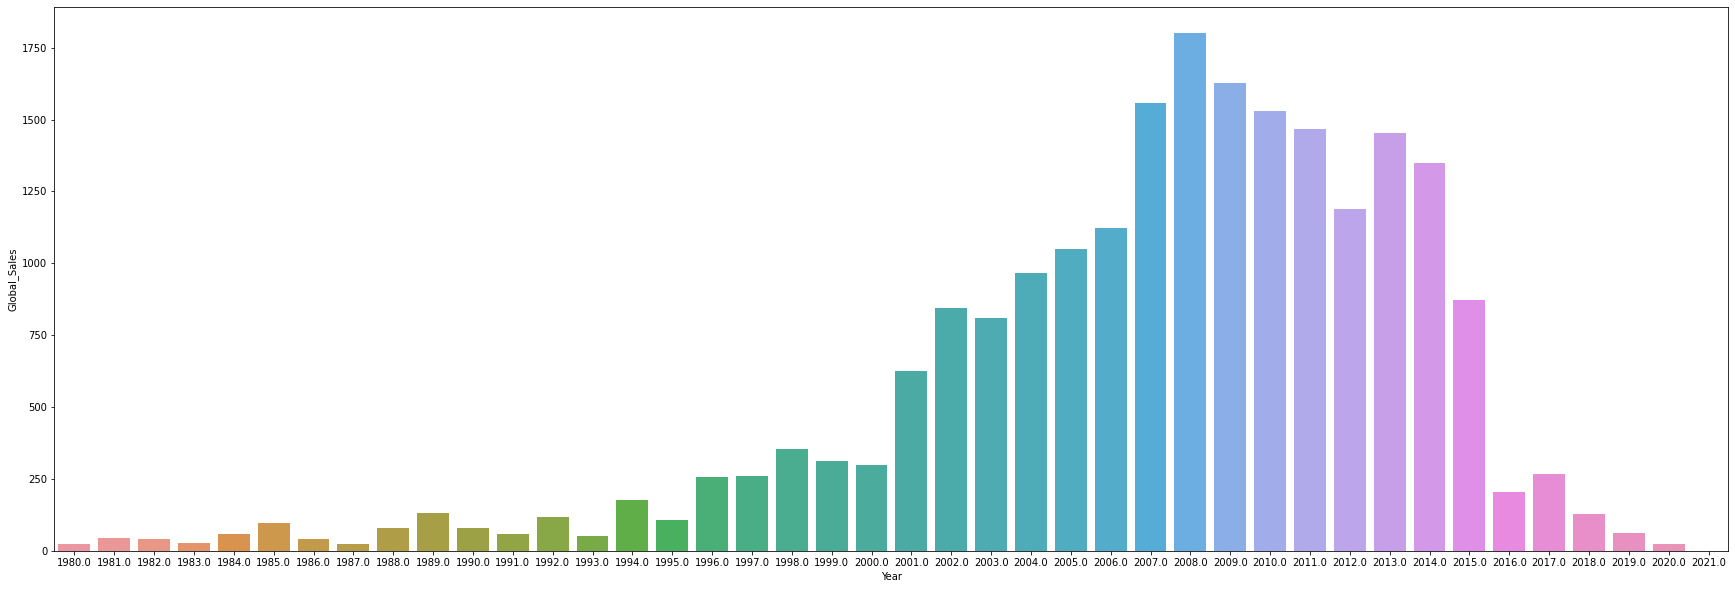

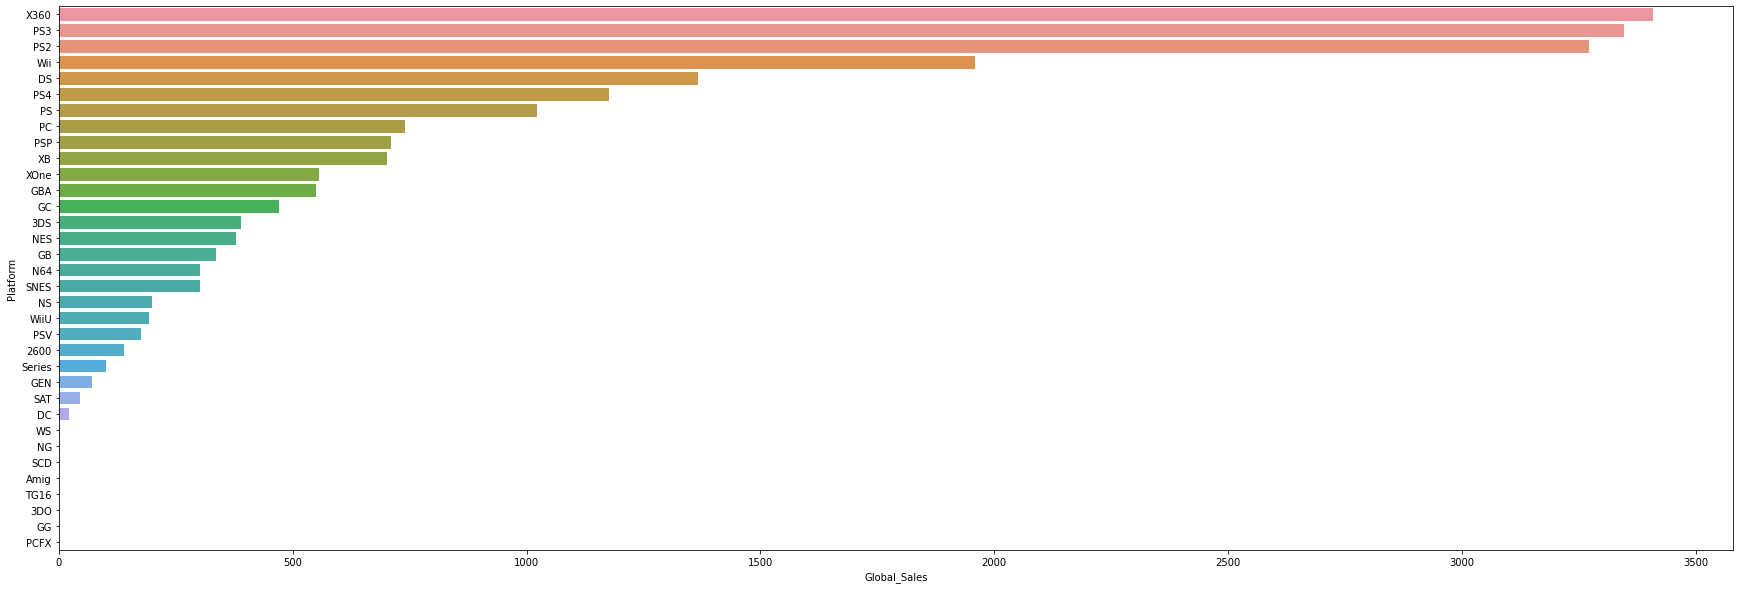

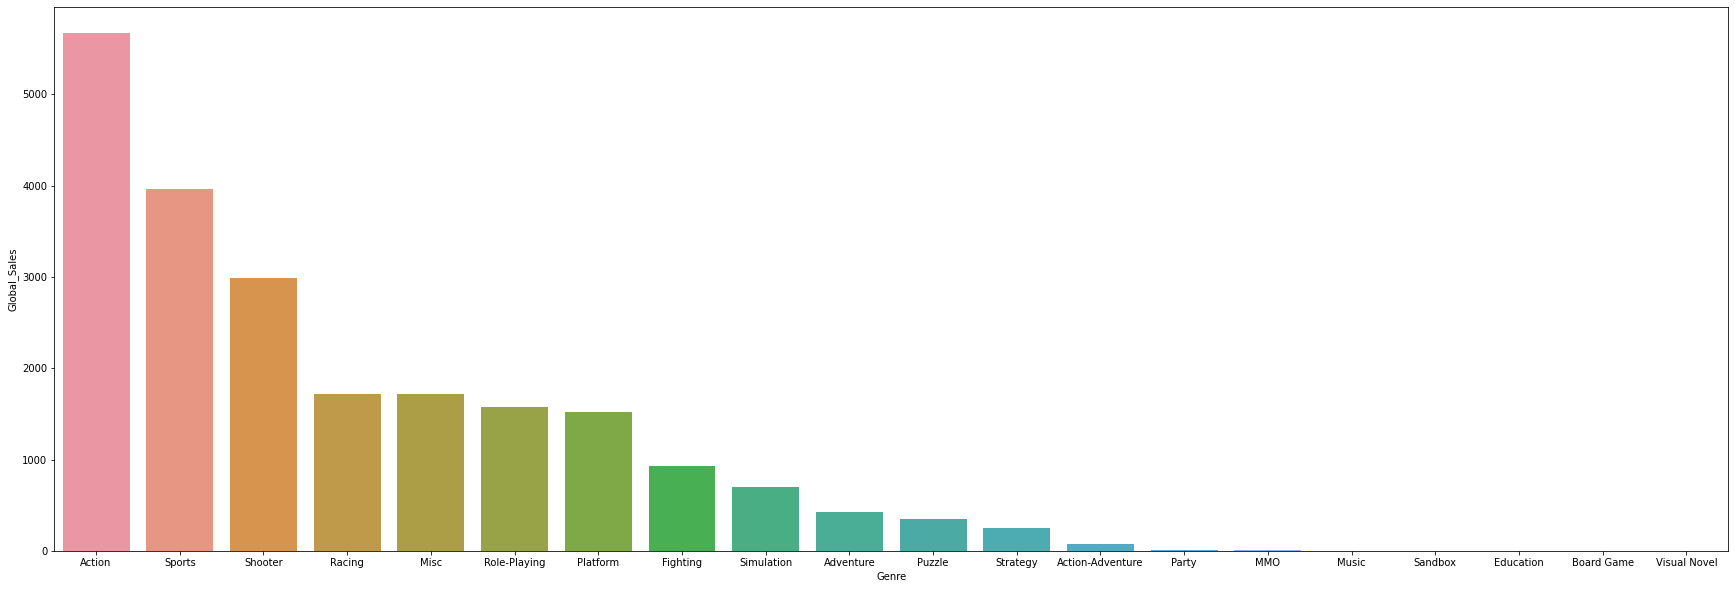

In [186]:
SNS_BAR_PLOT("Year","Global_Sales",release_date_sale)

SNS_BAR_PLOT("Global_Sales","Platform",df_Platform)

SNS_BAR_PLOT("Genre","Global_Sales",df_Genre)


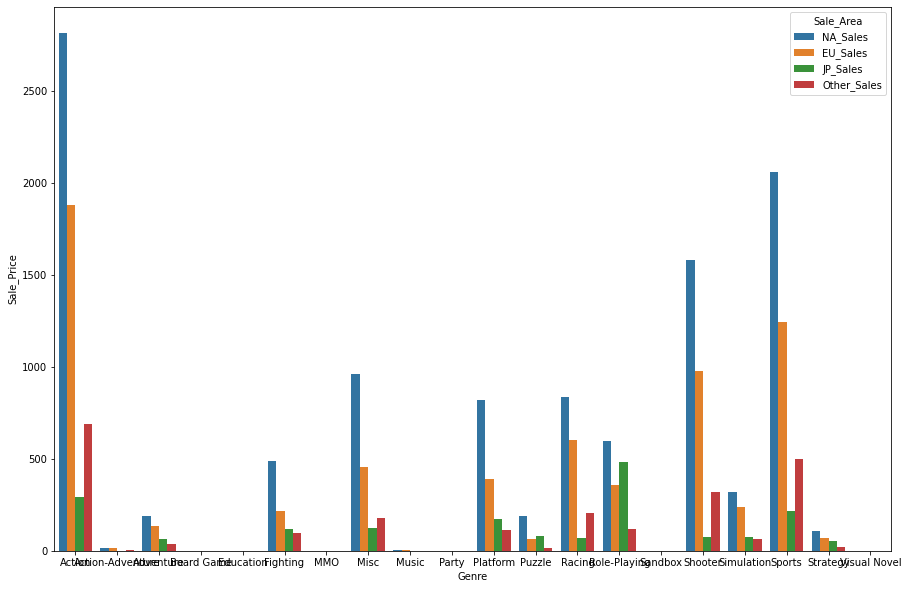

In [187]:
graph_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = graph_genre.groupby(by=['Genre']).sum()

comp_table = comp_map.reset_index().dropna()

comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

In [188]:
comp_map = comp_map.reset_index().dropna()

In [201]:
comp_map

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,2813.89,1880.89,290.20,691.07
1,Action-Adventure,16.98,13.48,1.31,4.91
2,Adventure,189.90,132.31,65.52,34.66
3,Board Game,0.06,0.22,0.02,0.02
4,Education,0.00,0.00,0.00,0.00
5,Fighting,487.08,216.36,118.25,95.08
6,MMO,0.55,0.26,0.20,0.13
7,Misc,962.85,456.98,123.94,177.26
8,Music,2.03,1.87,0.31,0.44
9,Party,0.40,0.62,0.00,0.16


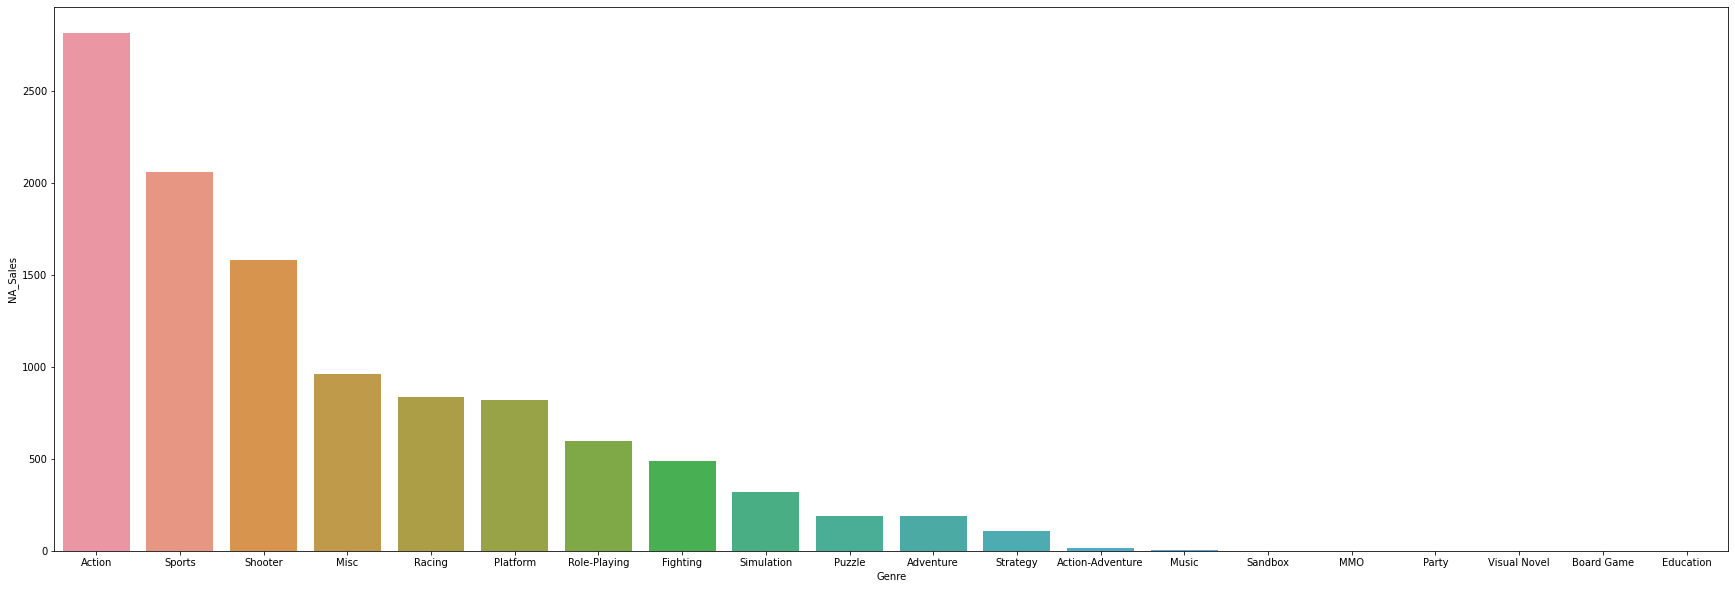

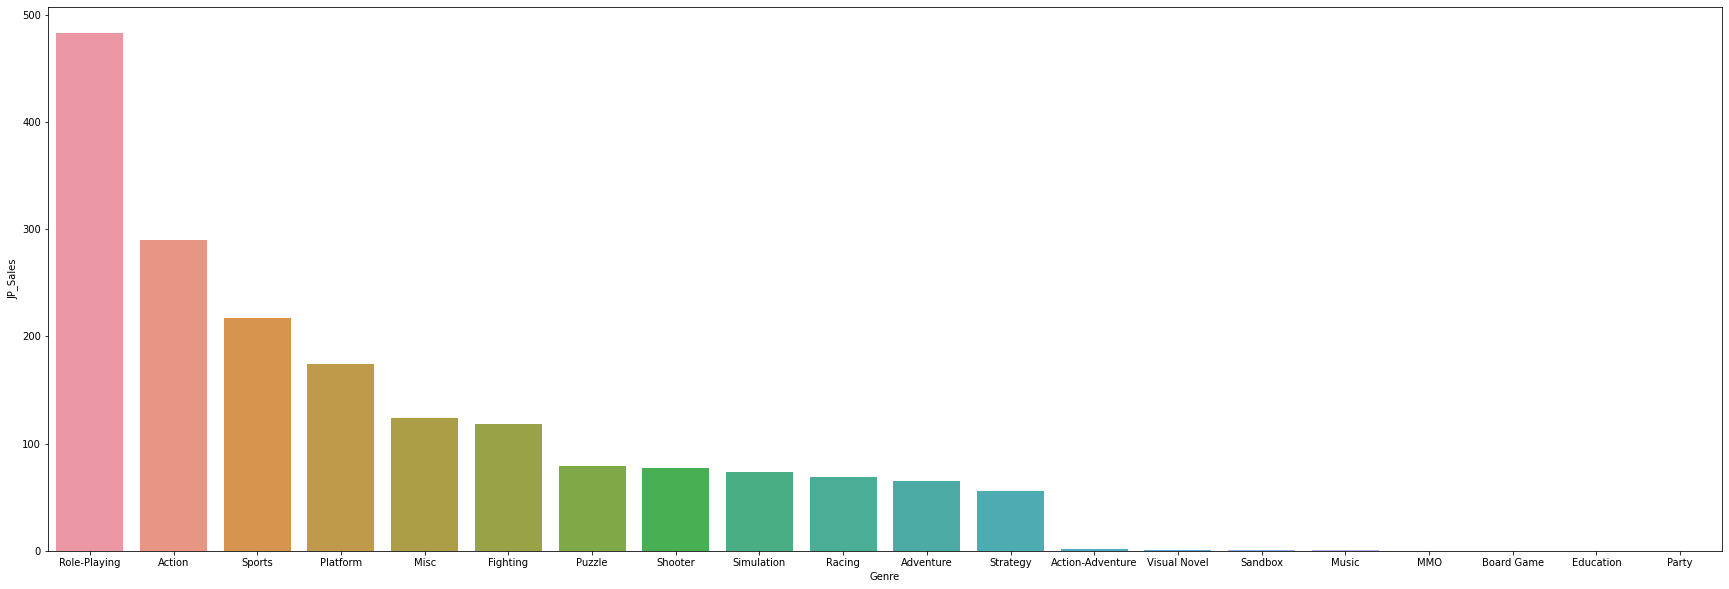

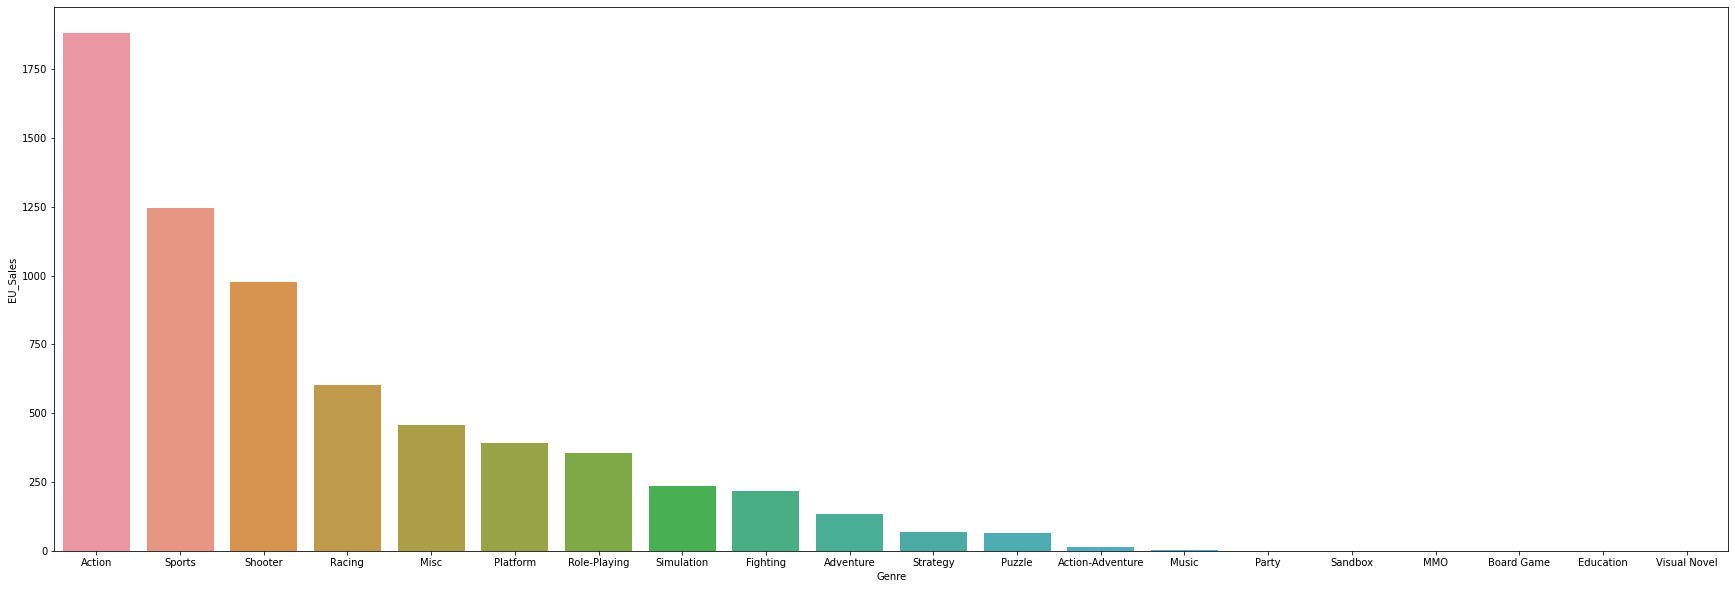

In [207]:
SNS_BAR_PLOT("Genre","NA_Sales",comp_map.sort_values(by="NA_Sales",ascending=False))

SNS_BAR_PLOT("Genre","JP_Sales",comp_map.sort_values(by="JP_Sales",ascending=False))
SNS_BAR_PLOT("Genre","EU_Sales",comp_map.sort_values(by="EU_Sales",ascending=False))

In [190]:
import numpy as np
USE=df[["Name","Year","Platform","Genre","Publisher","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].dropna()
USE["linear"]= np.nan

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

def LinearRegression_use(features , target):
   X_train, X_test, y_train, y_test = train_test_split( USE[[features]],USE[[target]],test_size = 0.2, random_state = 11)
   model =  LinearRegression()
   model.fit(X_train, y_train)
   
   print("MSE:",mean_squared_error(y_test, model.predict(X_test)))

   y_pred = model.predict(USE[[features]])
   USE["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
   USE["compare"]=USE["linear"]<USE[target]
   return USE

In [192]:
USE_LIST = ["Name","Platform","Genre","Publisher","Global_Sales","JP_Sales","compare","linear"]

In [193]:
def graph(X,Y):
   USE = LinearRegression_use(X, Y).dropna()
   df_True = USE[USE[USE_LIST]["compare"]==True]
   df_False = USE[USE[USE_LIST]["compare"]==False]
   df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
   df_True[df_True["linear"]<0] =0 
   plt.figure(figsize=(20,10)) 
   return sns.barplot(x=df_True["Genre"], y=df_True[Y], data=df_True)

MSE: 0.04645026916728978


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-193-dcadc27e8192>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True[df_True["linear"]<0] =0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

MSE: 0.07015048967142683


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-193-dcadc27e8192>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True[df_True["linear"]<0] =0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

MSE: 0.05918137807855363


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-193-dcadc27e8192>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True[df_True["linear"]<0] =0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

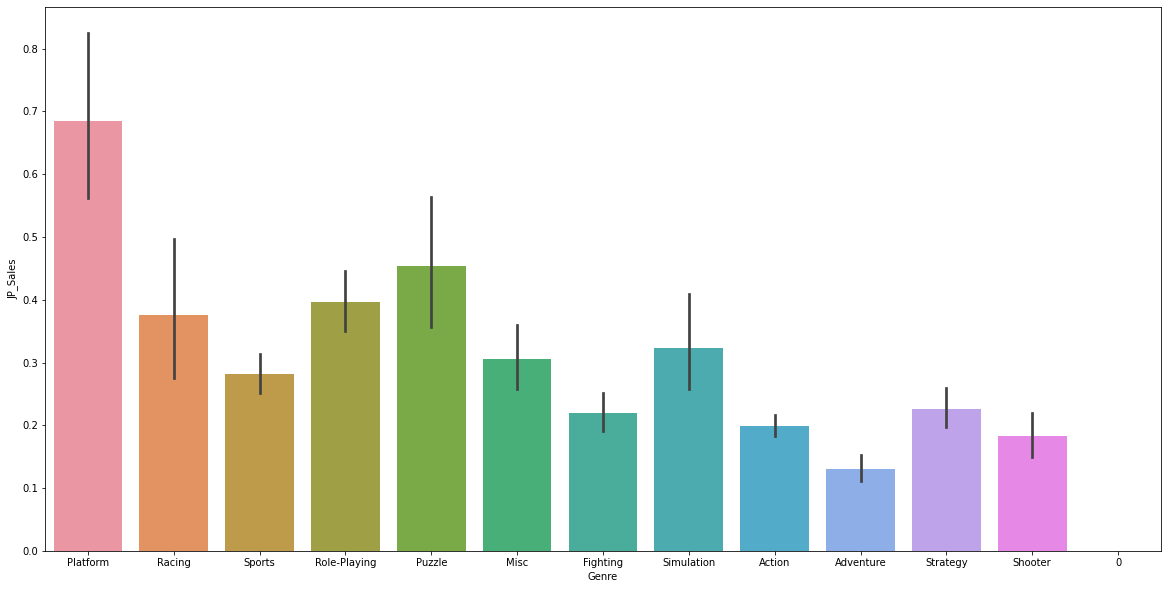

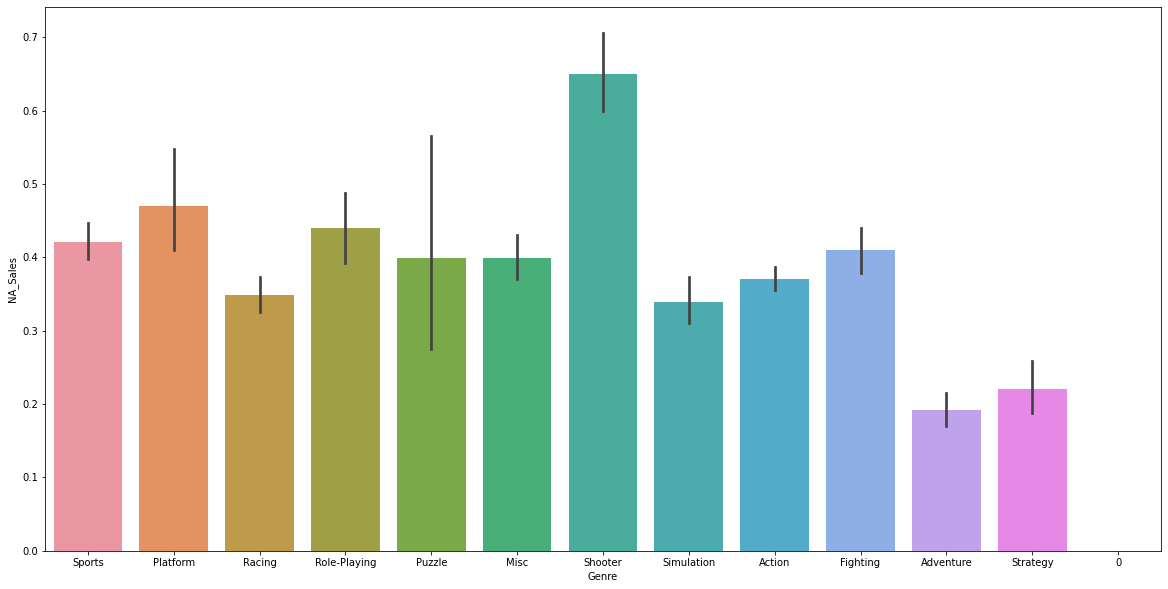

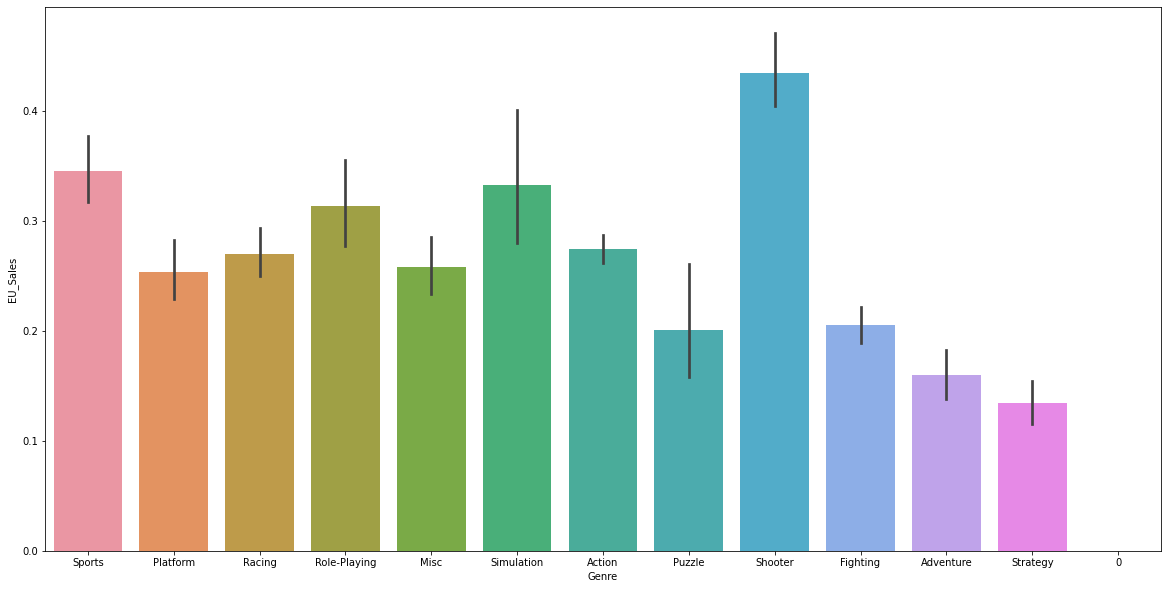

In [194]:
graph("Global_Sales","JP_Sales")
graph("Global_Sales","NA_Sales")
graph("Global_Sales","EU_Sales")

예상 밖으로 인기가 있었던 장르는 Platform  Puzzle, Racing 으로 파악됨 

In [195]:
chart = USE[["Year","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].groupby("Year").sum().reset_index()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

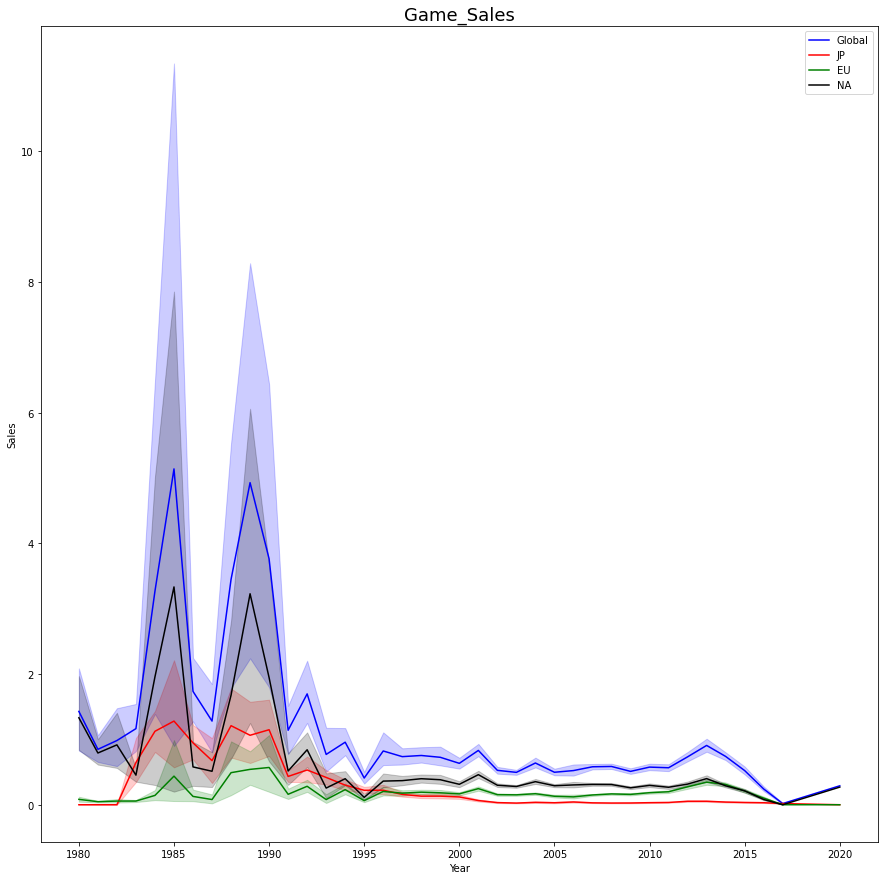

In [196]:
sns.lineplot(USE["Year"], USE["Global_Sales"],label='Global', color='blue' ) 
sns.lineplot(USE["Year"], USE["JP_Sales"],label='JP', color='red' ) 
sns.lineplot(USE["Year"], USE["EU_Sales"],label='EU', color='green' ) 
sns.lineplot(USE["Year"], USE["NA_Sales"],label='NA', color='black' ) 
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Game_Sales", fontsize = 18)

plt.show()

In [197]:
critic_df= df[["Critic_Score","Critic_Count","User_Score","User_Count","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Rating"]].dropna()

정확도 51.37614678899083 점


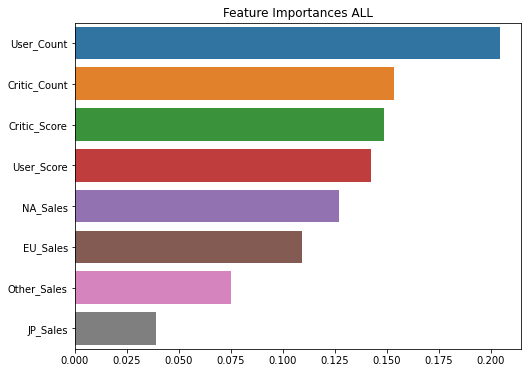

정확도 83.16794607751358 점


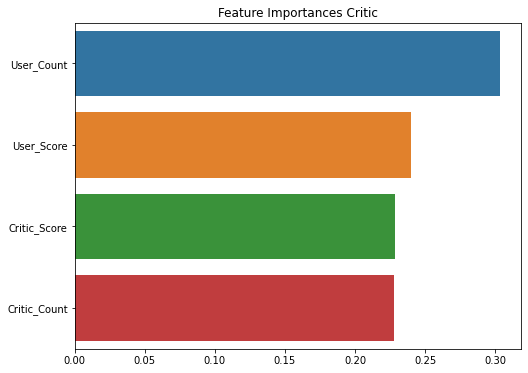

정확도 53.06122448979592 점


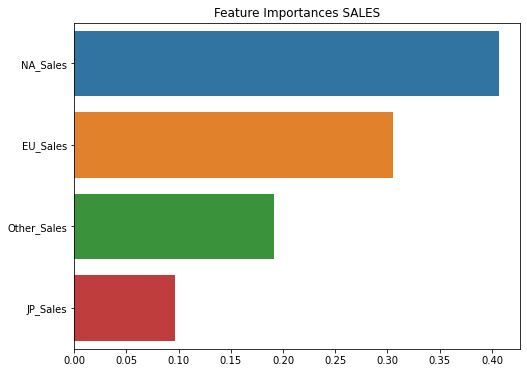

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ALL = critic_df[["Critic_Score","Critic_Count","User_Score","User_Count","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
CRITIC =critic_df[["Critic_Score","Critic_Count","User_Score","User_Count"]]
SALES =critic_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
def critic(n, LIST, TITLE):
   %matplotlib inline
   Rating = pd.get_dummies(critic_df["Rating"])
   
   X_Critic = LIST
   y_Global = Rating  

   X_train ,X_test , y_train, y_test = train_test_split(X_Critic, y_Global, train_size= 0.7 , test_size =0.3)

   clf = RandomForestClassifier(n_estimators=n)
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   print("정확도",accuracy_score(y_test,y_pred)*100,"점")
   ftr_importances_values = clf.feature_importances_
   ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
   tr_top20 = ftr_importances.sort_values(ascending=False)

   return make_chart(TITLE, tr_top20,  tr_top20.index)

def make_chart(TITLE, X, Y ):
   plt.figure(figsize=(8,6))
   plt.title(TITLE)
   sns.barplot(x=X, y=Y)
   return plt.show()

critic(100, ALL,"Feature Importances ALL")
critic(100, CRITIC ,"Feature Importances Critic")
critic(100, SALES ,"Feature Importances SALES")

정확도가 썩 좋진 않다


- 평점들 위주로 데이터 평가에 영향을 주고 있다. 

- 판매량으로 등급 예측은 가능하지만 정확도가 많이 떨어진다 -> 단순히 판매량만으로 등급을 매기기엔 어려움 

- 유저 투표량, 크리틱 점수 등 게임 평점을 영향을 크게 받음 ->  게임의 완성도에 따라서 등급이 매겨진다는것을 알 수 있음 

- 단순히 판매량만 높다고 해서 좋은 게임은 아니라는 뜻 

In [199]:
#게임의 등급을 정하는데는 판매량보다는 투표량 (?) 과 점수가 더 중요 , 좋은 게임을 만들기 위해서는 판매량보다는 완성도에 중점을 둬야함 

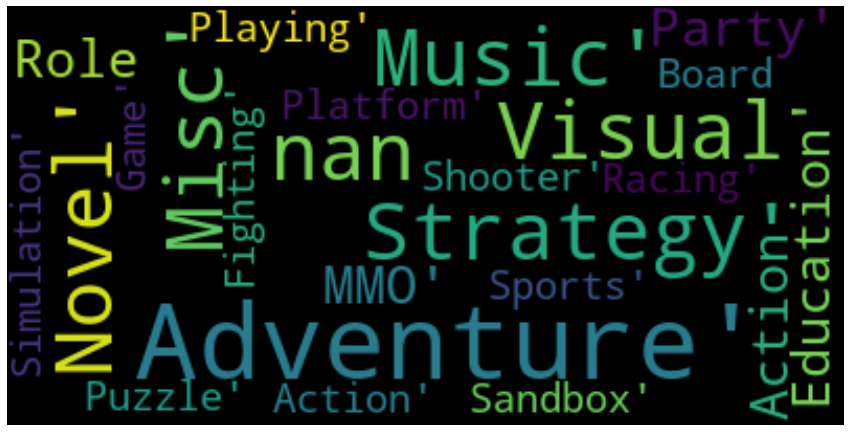

In [200]:

from wordcloud import WordCloud, ImageColorGenerator

text = list(set(df['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()